In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from util.pairs_selection import *
from util.backtest import *
from util.bands import *
from util.pf import round_trips as rt
plt.rcParams["font.family"] = "NanumGothic"
import warnings
warnings.filterwarnings(action='ignore')

import pickle
from pathlib import Path

/home/lululalamoon/PycharmProjects/Woosun/util/pf/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# Data load
pairs_list = [#('CJ', 'CJ4우(전환)'),
 ('CJ', 'CJ우'),
 ('CJ제일제당', 'CJ제일제당 우'),
 ('DB하이텍', 'DB하이텍1우'),
 #('DL이앤씨', 'DL이앤씨2우(전환)'),
 #('DL이앤씨', 'DL이앤씨우'),
 ('GS', 'GS우'),
 #('JW중외제약', 'JW중외제약2우B'),
 ('JW중외제약', 'JW중외제약우'),
 ('LG', 'LG우'),
 ('LG생활건강', 'LG생활건강우'),
 ('LG전자', 'LG전자우'),
 ('LG화학', 'LG화학우'),
 #('LX하우시스', 'LX하우시스우'),
 ('NH투자증권', 'NH투자증권우'),
 #('SK', 'SK우'),
 ('SK네트웍스', 'SK네트웍스우'),
 ('SK이노베이션', 'SK이노베이션우'),
 ('S-Oil', 'S-Oil우'),
 ('금호석유', '금호석유우'),
 ('넥센타이어', '넥센타이어1우B'),
 ('대상', '대상우'),
 ('대한항공', '대한항공우'),
 #('미래에셋증권', '미래에셋증권2우B'),
 ('미래에셋증권', '미래에셋증권우'),
 ('삼성SDI', '삼성SDI우'),
 #('삼성물산', '삼성물산우B'),
 ('삼성전기', '삼성전기우'),
 ('삼성전자', '삼성전자우'),
 ('삼성화재', '삼성화재우'),
 #('아모레G', '아모레G3우(전환)'),
 ('아모레G', '아모레G우'),
 ('아모레퍼시픽', '아모레퍼시픽우'),
 ('유한양행', '유한양행우'),
 #('하이트진로', '하이트진로2우B'),
 ('한국금융지주', '한국금융지주우'),
 #('한화', '한화3우B'),
 ('한화', '한화우'),
 ('한화솔루션', '한화솔루션우'),
 ('현대건설', '현대건설우'),
 #('현대차', '현대차2우B'),
 #('현대차', '현대차3우B'),
 ('현대차', '현대차우'),
 ('호텔신라', '호텔신라우')]

In [121]:
pairs_list = [#('CJ', 'CJ4우(전환)'),
     ('CJ', 'CJ우'),
     ('CJ제일제당', 'CJ제일제당 우'),
     ('DB하이텍', 'DB하이텍1우'),
     #('DL이앤씨', 'DL이앤씨2우(전환)'),
     #('DL이앤씨', 'DL이앤씨우'),
     ('GS', 'GS우'),
     #('JW중외제약', 'JW중외제약2우B'),
     ('JW중외제약', 'JW중외제약우'),
     ('LG', 'LG우'),
     ('LG생활건강', 'LG생활건강우'),
     ('LG전자', 'LG전자우'),
     ('LG화학', 'LG화학우'),
    # ('LX하우시스', 'LX하우시스우'),
     ('NH투자증권', 'NH투자증권우'),
     #('SK', 'SK우'),
     ('SK네트웍스', 'SK네트웍스우'),
     ('SK이노베이션', 'SK이노베이션우'),
     ('S-Oil', 'S-Oil우'),
     ('금호석유', '금호석유우'),
     ('넥센타이어', '넥센타이어1우B'),
     ('대상', '대상우'),
     ('대한항공', '대한항공우'),
     #('미래에셋증권', '미래에셋증권2우B'),
     ('미래에셋증권', '미래에셋증권우'),
     ('삼성SDI', '삼성SDI우'),
     #('삼성물산', '삼성물산우B'),
     ('삼성전기', '삼성전기우'),
     ('삼성전자', '삼성전자우'),
     ('삼성화재', '삼성화재우'),
     #('아모레G', '아모레G3우(전환)'),
     ('아모레G', '아모레G우'),
     ('아모레퍼시픽', '아모레퍼시픽우'),
     ('유한양행', '유한양행우'),
     #('하이트진로', '하이트진로2우B'),
     ('한국금융지주', '한국금융지주우'),
     #('한화', '한화3우B'),
     ('한화', '한화우'),
     ('한화솔루션', '한화솔루션우'),
     ('현대건설', '현대건설우'),
     #('현대차', '현대차2우B'),
     #('현대차', '현대차3우B'),
     ('현대차', '현대차우'),
     ('호텔신라', '호텔신라우')]

In [122]:
main_path = '/home/lululalamoon/CHO/chosta/data/k_stocks/daily/ohlcv'
ohlcv_list=[]
price_pairs = []
stock_names = []
for pair in pairs_list:
    for j in pair:
        data = pd.read_csv(main_path + f'/{j}_ohlcv.csv', index_col=0, parse_dates=True)
        ohlcv_list.append(data)
        stock_names.append(j)
ohlcv_dict = dict(zip(stock_names, ohlcv_list))

In [128]:
trades_df = pd.read_csv('data/trades_df.csv', index_col=0, parse_dates=True)

In [132]:
initial_invest = 100_000_000
c = 0.002 # 거래당
all_transactions = []
all_inventories = []
for i in range(len(trades_df.asset.unique())):
    trades_df_i = trades_df[trades_df.asset == trades_df.asset.unique()[i]]

    price_pairs = []
    stock_names = list(eval(trades_df.asset.unique()[i]))
    for j in stock_names:
        price = ohlcv_dict[j].종가.rename(j)
        price_pairs.append(price)

    transactions_list = []
    asset_common = price_pairs[0].name
    asset_preferred = price_pairs[1].name

    inventory_now = initial_invest
    inventory_history = [inventory_now]

    for t in trades_df_i.index: # t는 하나의 round-trip
        entry = pd.to_datetime(trades_df_i.entry[t])
        exit = pd.to_datetime(trades_df_i.exit[t])

        pos = trades_df_i.position[t]

        p1_in = price_pairs[0][entry]
        p2_in = price_pairs[1][entry]
        p1_out = price_pairs[0][exit]
        p2_out = price_pairs[1][exit]
        q1 = int(inventory_now/ (2*p1_in))
        q2 = int(inventory_now/ (2*p2_in))

        one_transaction = [[entry, -pos*q1, p1_in, asset_common],
                  [entry, pos*q2, p2_in, asset_preferred],
                  [exit, pos*q1, p1_out, asset_common],
                  [exit, -pos*q2, p2_out, asset_preferred]]
        one_transaction = pd.DataFrame(one_transaction, columns=['index','amount','price','symbol']).set_index('index')

        pnl1_ = (-pos)*(q1*p1_out - q1*p1_in)
        pnl2_ = pos*(q2*p2_out - q2*p2_in)
        
        if pnl1_<0:
            pnl1 = pnl1_*(1+c)
        elif pnl1_>=0:
            pnl1 = pnl1_*(1-c)
            
        if pnl2_<0:
            pnl2 = pnl2_*(1+c)
        elif pnl2_>=0:
            pnl2 = pnl2_*(1-c)
        
        inventory_now += (pnl1+pnl2)
        inventory_history.append(inventory_now)
        transactions_list.append(one_transaction)
        
    transactions = pd.concat(transactions_list)
    
    ind_ = [list(trades_df_i.entry)[0]] + list(trades_df_i.exit)
    inventory = pd.Series(inventory_history, index=pd.to_datetime(ind_))
    inventory = inventory.resample('D').last().ffill()
    inventory = inventory.to_frame().rename(
        columns={0:stock_names[0]+' & '+stock_names[1]})
    
    if np.any(inventory<=0):
        from_ind_ = inventory[inventory.iloc[:,0]<=0].index[0]
        inventory.loc[from_ind_:,:] = 0
        
    all_transactions.append(transactions)
    all_inventories.append(inventory)

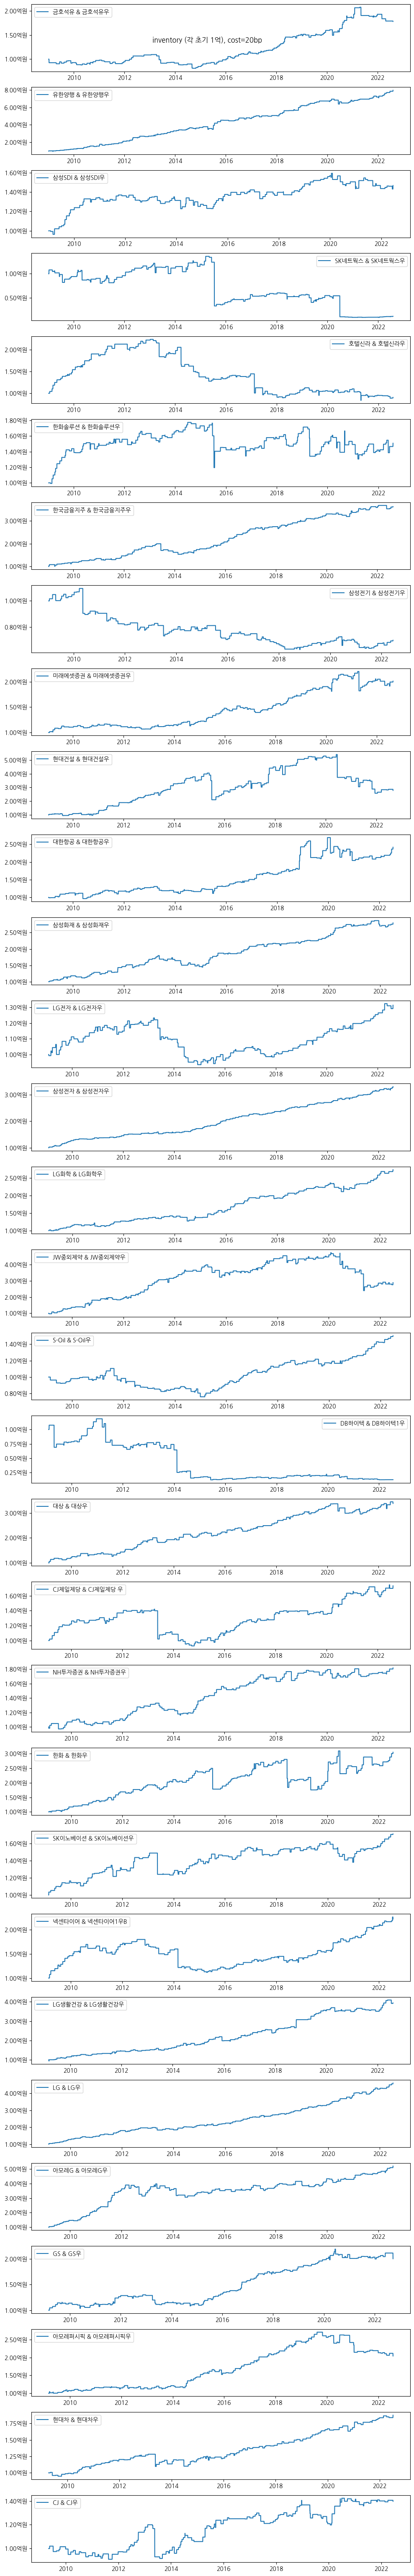

In [134]:
import matplotlib.ticker as ticker
f,axs = plt.subplots(len(all_inventories),figsize=(10, 2*len(all_inventories)))
f.suptitle('inventory (각 초기 1억), cost=20bp')
for n in range(len(all_inventories)):
    i = all_inventories[n]
    axs[n].yaxis.set_major_formatter(
        ticker.FuncFormatter(lambda i,
                             pos:'{:,.2f}'.format(i/100_000_000) + '억원'))
    axs[n].plot(i)
    axs[n].legend(i)
    
f.tight_layout()
plt.savefig('img/inven.png')
plt.show()    

In [135]:
inv_sum = pd.concat(all_inventories, axis=1).fillna(method='ffill').fillna(method='bfill').sum(axis=1)

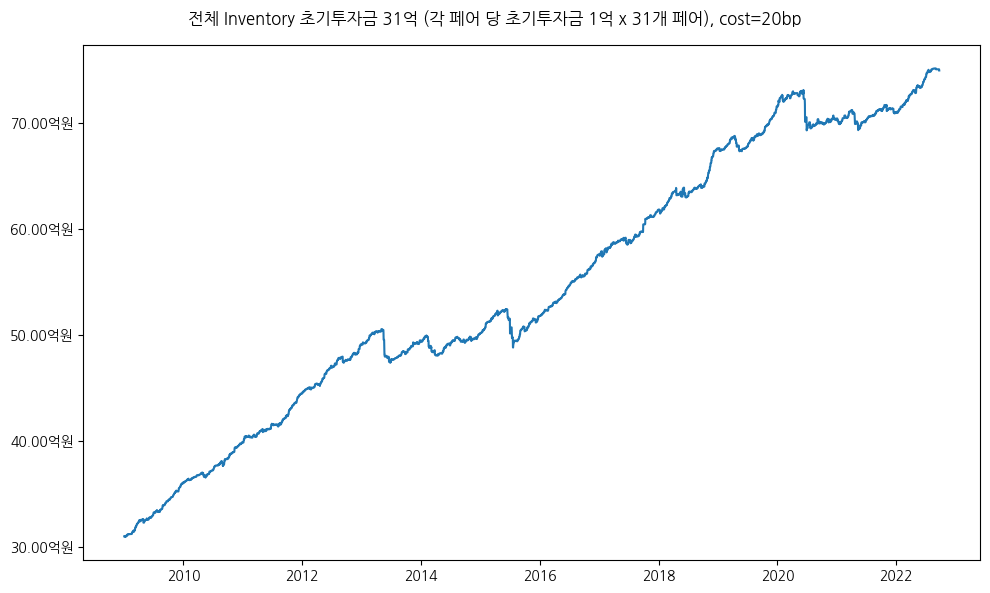

In [136]:
f, ax = plt.subplots(1,figsize=(10, 6))
f.suptitle('전체 Inventory 초기투자금 31억 (각 페어 당 초기투자금 1억 x 31개 페어), cost=20bp')
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda inv_sum,
                         pos:'{:,.2f}'.format(inv_sum/100_000_000) + '억원'))
ax.plot(inv_sum)
f.tight_layout()
plt.savefig('img/inven_sum.png')
plt.show()    